### Import the necessary libraries


In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import SelectKBest
from sklearn import datasets, model_selection, metrics

from sklearn import datasets, model_selection
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

### Load the data

In [156]:
url = " https://docs.google.com/spreadsheets/d/e/2PACX-1vSUoGLZ90Qr6A5-DmdYD30CIEwMqIAmtWSbdcLgi10u5WoCtCuj_RuSm7wDsFsfcwPGRB6ZZDduCxpO/pub?gid=108149846&single=true&output=csv"
happiness_df = pd.read_csv(url)

Index(['Country', 'region', 'Happiness Score', 'GDP', 'Social_support',
       'Healthy Life_Expectancy', 'Freedom', 'corruptionperception',
       'Generosity'],
      dtype='object')


In [157]:
print(happiness_df.info())
print(happiness_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  163 non-null    object 
 1   region                   162 non-null    object 
 2   Happiness Score          162 non-null    float64
 3   GDP                      163 non-null    float64
 4   Social_support           163 non-null    float64
 5   Healthy Life_Expectancy  162 non-null    float64
 6   Freedom                  163 non-null    float64
 7   corruptionperception     163 non-null    float64
 8   Generosity               163 non-null    float64
dtypes: float64(7), object(2)
memory usage: 11.6+ KB
None
       Country          region  Happiness Score      GDP  Social_support  \
0  Switzerland  Western Europe            7.587  1.39651         1.34951   
1      Iceland  Western Europe            7.561  1.30232         1.40223   
2      Denmark  

### Renaming each column to be of the style, 'Column Name'

In [159]:
happiness_df = happiness_df.rename(columns={'region':'Region','corruptionperception':'Corruption Perception','Social_support':'Social Support','Healthy Life_Expectancy':'Healthy Life Expectancy'})
print(happiness_df.head())

       Country          Region  Happiness Score      GDP  Social Support  \
0  Switzerland  Western Europe            7.587  1.39651         1.34951   
1      Iceland  Western Europe            7.561  1.30232         1.40223   
2      Denmark  Western Europe            7.527  1.32548         1.36058   
3       Norway  Western Europe            7.522  1.45900         1.33095   
4       Canada   North America            7.427  1.32629         1.32261   

   Healthy Life Expectancy  Freedom  Corruption Perception  Generosity  
0                  0.94143  0.66557                0.41978     0.29678  
1                  0.94784  0.62877                0.14145     0.43630  
2                  0.87464  0.64938                0.48357     0.34139  
3                  0.88521  0.66973                0.36503     0.34699  
4                  0.90563  0.63297                0.32957     0.45811  
Index(['Country', 'Region', 'Happiness Score', 'GDP', 'Social Support',
       'Healthy Life Expectancy',

### Dropping duplicate rows

In [161]:
happiness_df = happiness_df.drop_duplicates()

Index(['Country', 'Region', 'Happiness Score', 'GDP', 'Social Support',
       'Healthy Life Expectancy', 'Freedom', 'Corruption Perception',
       'Generosity'],
      dtype='object')


### Determining the datatpes of each feature: _fetching null values_

In [163]:
happiness_df.info()
non_null_counts = happiness_df.count()
print(non_null_counts)

<class 'pandas.core.frame.DataFrame'>
Index: 158 entries, 0 to 161
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  158 non-null    object 
 1   Region                   157 non-null    object 
 2   Happiness Score          157 non-null    float64
 3   GDP                      158 non-null    float64
 4   Social Support           158 non-null    float64
 5   Healthy Life Expectancy  157 non-null    float64
 6   Freedom                  158 non-null    float64
 7   Corruption Perception    158 non-null    float64
 8   Generosity               158 non-null    float64
dtypes: float64(7), object(2)
memory usage: 12.3+ KB
Country                    158
Region                     157
Happiness Score            157
GDP                        158
Social Support             158
Healthy Life Expectancy    157
Freedom                    158
Corruption Perception      158
Genero


### Dropping null values



In [165]:
happiness_df.dropna(inplace = True)
happiness_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 155 entries, 0 to 161
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  155 non-null    object 
 1   Region                   155 non-null    object 
 2   Happiness Score          155 non-null    float64
 3   GDP                      155 non-null    float64
 4   Social Support           155 non-null    float64
 5   Healthy Life Expectancy  155 non-null    float64
 6   Freedom                  155 non-null    float64
 7   Corruption Perception    155 non-null    float64
 8   Generosity               155 non-null    float64
dtypes: float64(7), object(2)
memory usage: 12.1+ KB
Index(['Country', 'Region', 'Happiness Score', 'GDP', 'Social Support',
       'Healthy Life Expectancy', 'Freedom', 'Corruption Perception',
       'Generosity'],
      dtype='object')


### Determining the average (mean) and standard deviation (std) of the numerical variables

In [167]:
happiness_df1 = happiness_df.select_dtypes(include=[np.number])
mean_variables = happiness_df1.mean()
print("Mean Variables: " ,mean_variables)

std_variables = happiness_df1.std()
print("Standard Deviation Variables: ",std_variables)

Mean Variables:  Happiness Score            5.358213
GDP                        0.842752
Social Support             0.988092
Healthy Life Expectancy    0.628184
Freedom                    0.428077
Corruption Perception      0.144177
Generosity                 0.237222
dtype: float64
Standard Deviation Variables:  Happiness Score            1.145438
GDP                        0.403924
Social Support             0.273686
Healthy Life Expectancy    0.248509
Freedom                    0.151113
Corruption Perception      0.120680
Generosity                 0.127596
dtype: float64
Index(['Country', 'Region', 'Happiness Score', 'GDP', 'Social Support',
       'Healthy Life Expectancy', 'Freedom', 'Corruption Perception',
       'Generosity'],
      dtype='object')


### Determining all the regions that were included in the dataset

In [193]:
#print(happiness_df.columns)
#print(happiness_df.shape[1])
unique_regions = happiness_df["Region"].unique()
print(unique_regions)
#print(len(unique_regions))

['Western Europe' 'North America' 'Australia and New Zealand'
 'Middle East and Northern Africa' 'Latin America and Caribbean'
 'Southeastern Asia' 'Central and Eastern Europe' 'Eastern Asia'
 'Sub-Saharan Africa' 'Southern Asia']
10


### Encoding Regions into a feature called "Region Encoded"

In [196]:
region_mapping = {'Western Europe':0,
                  'North America':1,
                  'Australia and New Zealand':2,
                  'Middle East and Northern Africa':3,
                  'Latin America and Caribbean':4,
                  'Southeastern Asia':5,
                  'Central and Eastern Europe':6,
                  'Eastern Asia':7,
                  'Sub-Saharan Africa':8,
                  'Southern Asia':9}
happiness_df['Region Encoded'] = happiness_df['Region'].map(region_mapping)
print(happiness_df[['Region','Region Encoded']])


                              Region  Region Encoded
0                     Western Europe               0
1                     Western Europe               0
2                     Western Europe               0
3                     Western Europe               0
4                      North America               1
..                               ...             ...
157               Sub-Saharan Africa               8
158               Sub-Saharan Africa               8
159  Middle East and Northern Africa               3
160               Sub-Saharan Africa               8
161               Sub-Saharan Africa               8

[155 rows x 2 columns]


### Visualizations

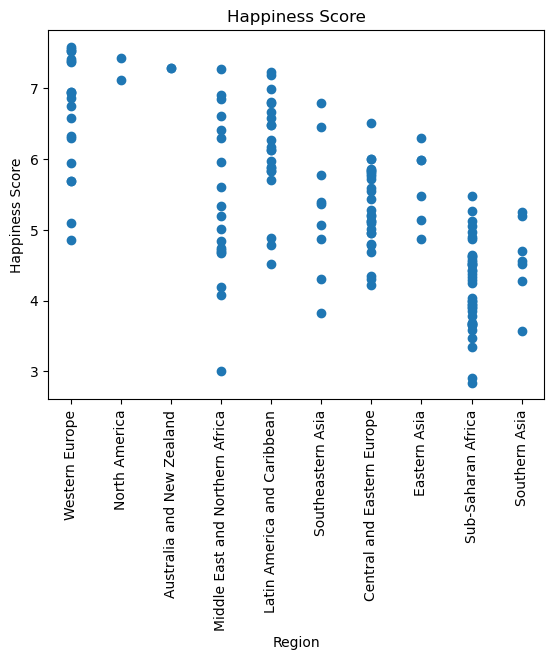

In [207]:
import matplotlib.pyplot as plt

plt.scatter(happiness_df['Region'], happiness_df['Happiness Score'])
plt.title("Happiness Score")
plt.xlabel("Region")
plt.ylabel("Happiness Score")
plt.xticks(rotation=90)  
plt.show()


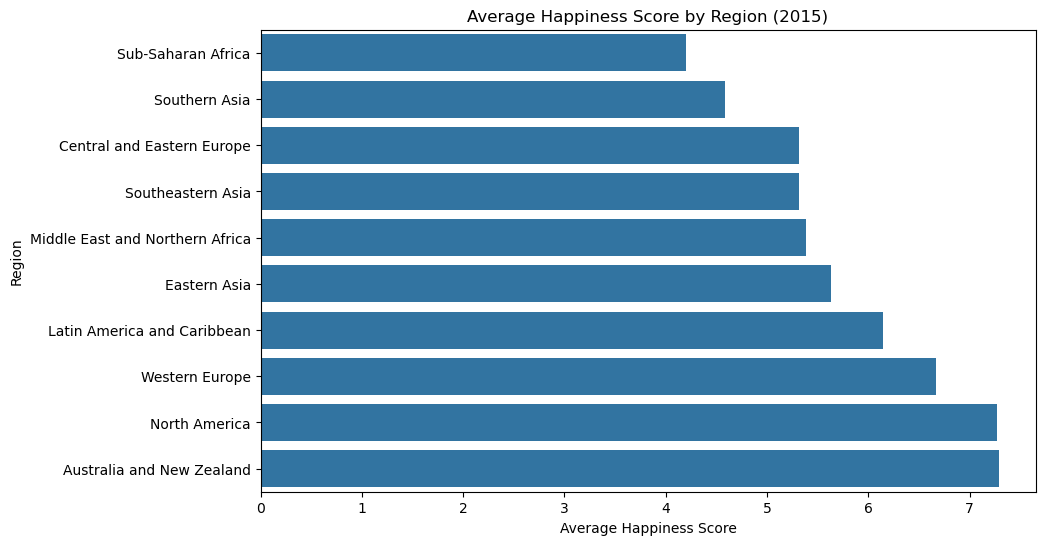

In [209]:
region_mean_scores = happiness_df.groupby('Region')['Happiness Score'].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=region_mean_scores, y=region_mean_scores.index)
plt.title('Average Happiness Score by Region (2015)')
plt.xlabel('Average Happiness Score')
plt.ylabel('Region')
plt.show()

# Predictions

### Prdicting numerical variables:

In [263]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score

### Predicting "Happiness Score"

In [228]:
X = happiness_df[['GDP','Social Support','Healthy Life Expectancy','Freedom','Corruption Perception','Generosity','Region Encoded']]#Features
y = happiness_df['Happiness Score']#Target

X_train, X_test, y_train, y_test= model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

### Linear Regression

In [234]:
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

### Prediction

In [241]:
lr_predictions = LR.predict(X_test)

### Evaluation

In [274]:
rmse = root_mean_squared_error(y_test, lr_predictions)
print("Root Mean Squared Error:", rmse)

print("Root Squared Score:", r2_score(y_test, lr_predictions))

Root Mean Squared Error: 0.5765900813310976
Root Squared Score: 0.7502095921148271
Root Mean Squared Error: 0.5765900813310976
Root Squared Score: 0.7502095921148271


### Using KNN

In [276]:
from sklearn.neighbors import KNeighborsRegressor

# KNN - Ensure data is scaled if using KNN
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

knn_predictions = knn_model.predict(X_test)

print("Root Mean Squared Error:", root_mean_squared_error(y_test, knn_predictions))
print("Root Squared Score:", r2_score(y_test, knn_predictions))

Root Mean Squared Error: 0.5776631533252554
Root Squared Score: 0.7492789742540891


### Predicting the happiness scores of these countries that reported the following results for their numerical measures:

**Country 1**

- GDP: 0.9
- Social Support: 0.4
- Healthy Life Expectancy: 0.8
- Freedom: 0.4
- Corruption Perception: 0.2
- Generosity: 0.09
- Region Encoded: 0


In [282]:
#Linear Regression
Country1 = pd.DataFrame([[0.9,0.4,0.8,0.4,0.2,0.09,0]], columns = ['GDP', 'Social Support', 'Healthy Life Expectancy', 'Freedom', 'Corruption Perception', 'Generosity','Region Encoded'])
prediction = LR.predict(Country1)
print("Linear Regression Prediction:",prediction)

#KNN
Country1 = pd.DataFrame([[0.9,0.4,0.8,0.4,0.2,0.09,0]], columns = ['GDP', 'Social Support', 'Healthy Life Expectancy', 'Freedom', 'Corruption Perception', 'Generosity','Region Encoded'])
prediction2 = knn_model.predict(Country1)
print("KNN Prediction:",prediction2)

Linear Regression Prediction: [5.02285268]
KNN Prediction: [5.7528]


**Country 2**

- GDP: 0.9
- Social Support: 0.4
- Healthy Life Expectancy: 0.8
- Freedom: 0.4
- Corruption Perception: 0.2
- Generosity: 0.09
- Region Encoded: 9

In [288]:
#Linear Regression
Country1 = pd.DataFrame([[0.9,0.4,0.8,0.4,0.2,0.09,9]], columns = ['GDP', 'Social Support', 'Healthy Life Expectancy', 'Freedom', 'Corruption Perception', 'Generosity','Region Encoded'])
prediction = LR.predict(Country1)
print("Linear Regression Prediction:",prediction)

#KNN
Country1 = pd.DataFrame([[0.9,0.4,0.8,0.4,0.2,0.09,9]], columns = ['GDP', 'Social Support', 'Healthy Life Expectancy', 'Freedom', 'Corruption Perception', 'Generosity','Region Encoded'])
prediction2 = knn_model.predict(Country1)
print("KNN Prediction:",prediction2)

Linear Regression Prediction: [4.45107738]
KNN Prediction: [4.4598]


**Country 3**

- GDP: 1.1
- Social Support: 0.9
- Healthy Life Expectancy: 1.01
- Freedom: 0.9
- Corruption Perception: 0.1
- Generosity: 0.9
- Region Encoded: 4

In [293]:
#Linear Regression
Country1 = pd.DataFrame([[1.1,0.9,1.01,0.9,0.1,0.9,4]], columns = ['GDP', 'Social Support', 'Healthy Life Expectancy', 'Freedom', 'Corruption Perception', 'Generosity','Region Encoded'])
prediction = LR.predict(Country1)
print("Linear Regression Prediction:",prediction)

#KNN
Country1 = pd.DataFrame([[1.1,0.9,1.01,0.9,0.1,0.9,4]], columns = ['GDP', 'Social Support', 'Healthy Life Expectancy', 'Freedom', 'Corruption Perception', 'Generosity','Region Encoded'])
prediction2 = knn_model.predict(Country1)
print("KNN Prediction:",prediction2)

Linear Regression Prediction: [6.66608078]
KNN Prediction: [6.5946]


### Visualizing the modeled relationship between Happinesss Score and Social Support to see if a qualitative relationship can be inferred.

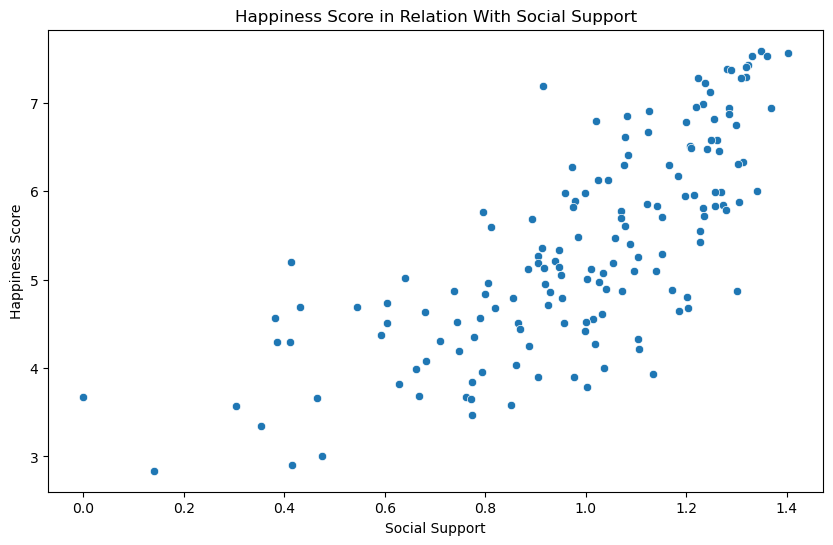

In [309]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.scatterplot(x='Social Support', y='Happiness Score', data=happiness_df)

plt.title('Happiness Score in Relation With Social Support')
plt.xlabel('Social Support')
plt.ylabel('Happiness Score')
plt.show()

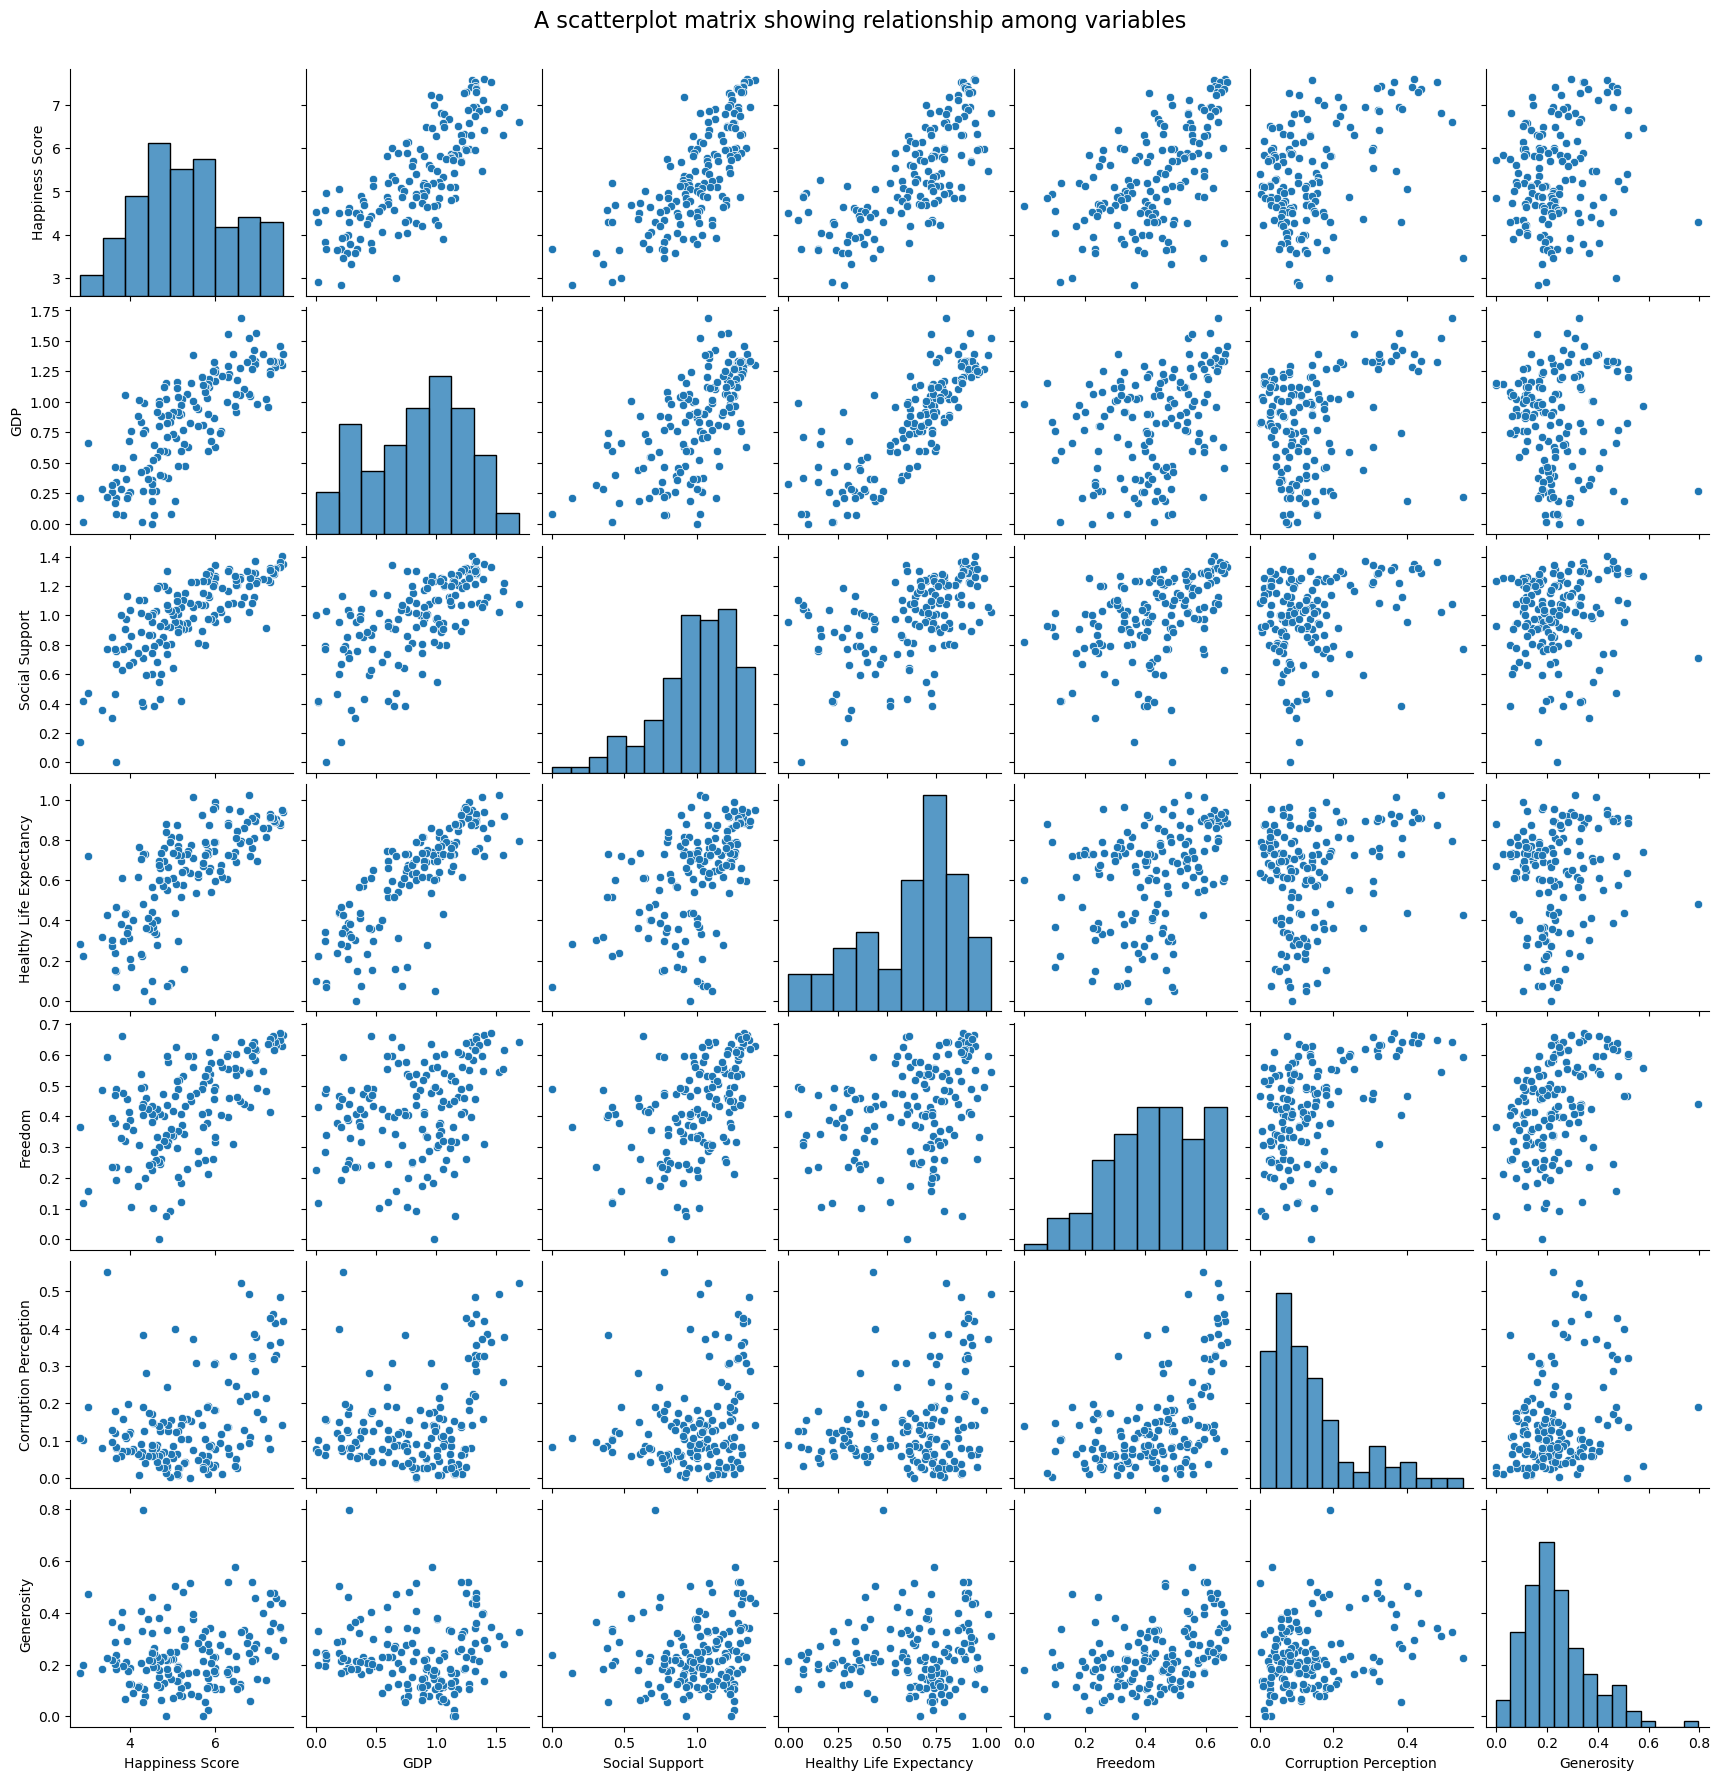

In [327]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a scatterplot matrix (pairplot) for specific columns
sns.pairplot(happiness_df[['Happiness Score', 'GDP', 'Social Support', 'Healthy Life Expectancy', 'Freedom', 'Corruption Perception', 'Generosity']])
plt.suptitle('A scatterplot matrix showing relationship among variables', y=1.02, fontsize=16)
plt.show()


<Figure size 1000x600 with 0 Axes>

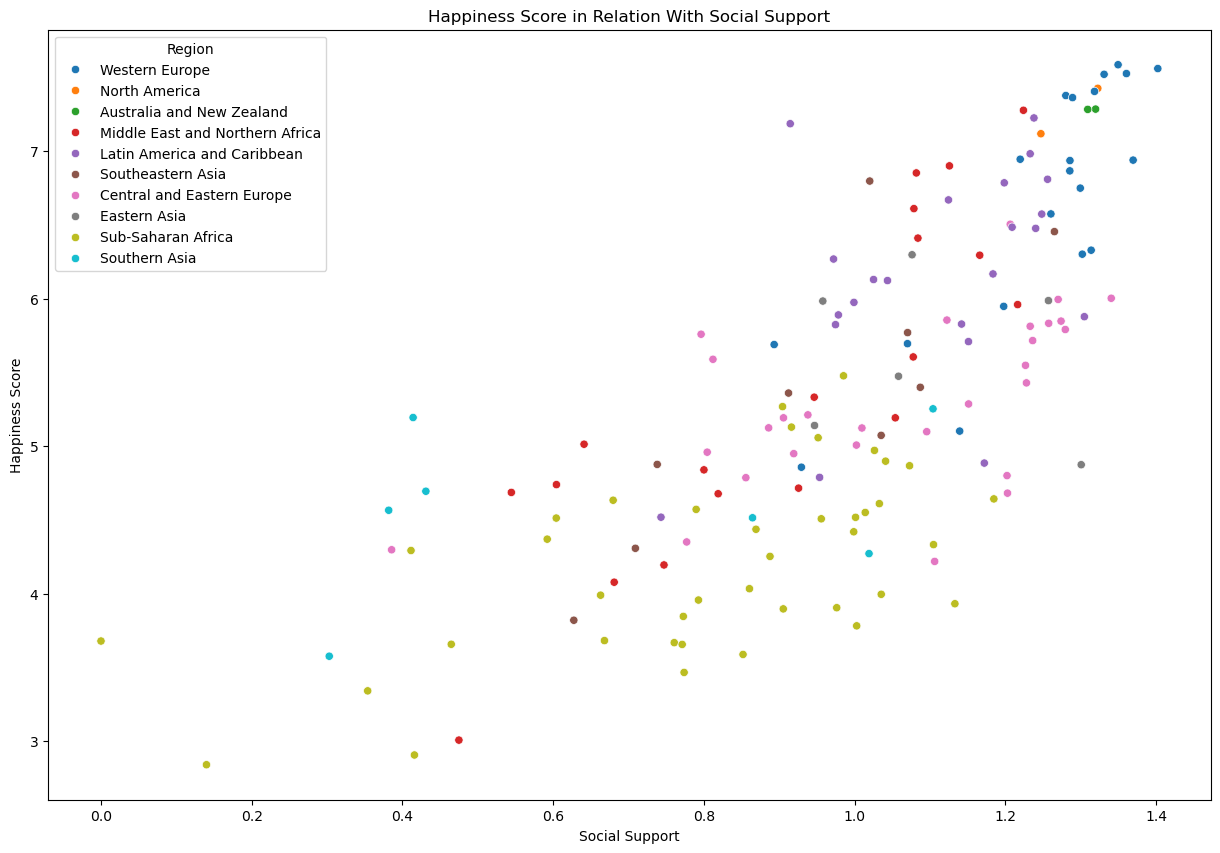

In [331]:
plt.figure(figsize=(10, 6))
happiness_score_threshold = 0
social_support_threshold = 0

plt.figure(figsize=(15, 10))
scatter = sns.scatterplot(
    x='Social Support',
    y='Happiness Score',
    data=happiness_df,
    hue='Region',  # Color coding by region
    legend='full'  # Include a full legend for regions
)

# Adding country labels, excluding crowded top-right area
for index, row in happiness_df.iterrows(): #          This line starts a loop that iterates over each row in the DataFrame(which is happiness_df)
    if row['Happiness Score'] < happiness_score_threshold or row['Social Support'] < social_support_threshold:  #This line checks if the current row's 'Happiness Score' is less than a defined threshold
     #and if the 'Social Support' is also below its respective threshold. #Essentilly, the countries should not appear since there is many countries within a region.
        scatter.text(
            row['Social Support'] + 0.01,  # X-axis location, the 0.01 is there to make sure not to put the text on TOP of the point.
            row['Happiness Score'],  # Y-axis location
            row['Country'],  # Country label
            horizontalalignment='left',
            size='small',
            color='black'
        )

plt.title('Happiness Score in Relation With Social Support')
plt.xlabel('Social Support')
plt.ylabel('Happiness Score')
plt.legend(title='Region')
plt.show()


### Looking at the coefficients and intercept of linear regression to determine the modeled relationships quantitatively.

In [336]:
Coefficients = LR.coef_
print('Coefficients: ', Coefficients)

Coefficients:  [ 0.76884745  1.3167578   0.68864     1.34176964  0.62572334  0.41021627
 -0.06353059]


In [338]:
Intercept = LR.intercept_
print('Intercept:', Intercept)

Intercept: 2.5545028628176802


## Questions and Answers to reflect:
- **Which machine learning algorithm was best suited for this section? Why?**
_Linear Regression was the best algorithm because as Social Support increased, so did the Happiness Score. The relationship between these variables ensures that an increase in Social Support consistently leads to a higher Happiness Score._

- **Consider the strengths and limitations of the KNN model for predicting happiness levels in different countries. How does it handle categorical versus numerical features in the dataset?**
_Calculations always operate between data points regardless of data type. For categorical data, you need to encode categories or labels into numbers for the algorithm to function correctly. Numerical values are handled directly, with no need for transformation, as calculations are based on the distance between the numbers._

- **Reflect on the ethical considerations and potential biases associated with using machine learning models to predict happiness levels. How might the choice between KNN and linear regression impact these considerations?**
_It is crucial to recognize that arranging and gathering data can potentially violate privacy and introduce biases during data transformation. When developing algorithms and models, it is essential to survey and analyze for biases in samples, labels, missing data, or the model itself. Addressing these biases is key to creating an accurate and fair model._

### Identifying the best numerical features

In [371]:
# Select only numeric columns
#numeric_cols = happiness_df.select_dtypes(include=[float, int])


Feature_Correlation = happiness_df1.corr()
print("Correlation Features:" , Feature_Correlation)

Correlation Features:                          Happiness Score       GDP  Social Support  \
Happiness Score                 1.000000  0.781894        0.738134   
GDP                             0.781894  1.000000        0.642706   
Social Support                  0.738134  0.642706        1.000000   
Healthy Life Expectancy         0.722331  0.816055        0.527183   
Freedom                         0.566106  0.363132        0.437887   
Corruption Perception           0.400631  0.305794        0.206385   
Generosity                      0.176404 -0.015295        0.084238   

                         Healthy Life Expectancy   Freedom  \
Happiness Score                         0.722331  0.566106   
GDP                                     0.816055  0.363132   
Social Support                          0.527183  0.437887   
Healthy Life Expectancy                 1.000000  0.355474   
Freedom                                 0.355474  1.000000   
Corruption Perception                   0.248

**GDP, social support and Healthy Life Expectancy are higly corrected with Happiness score**

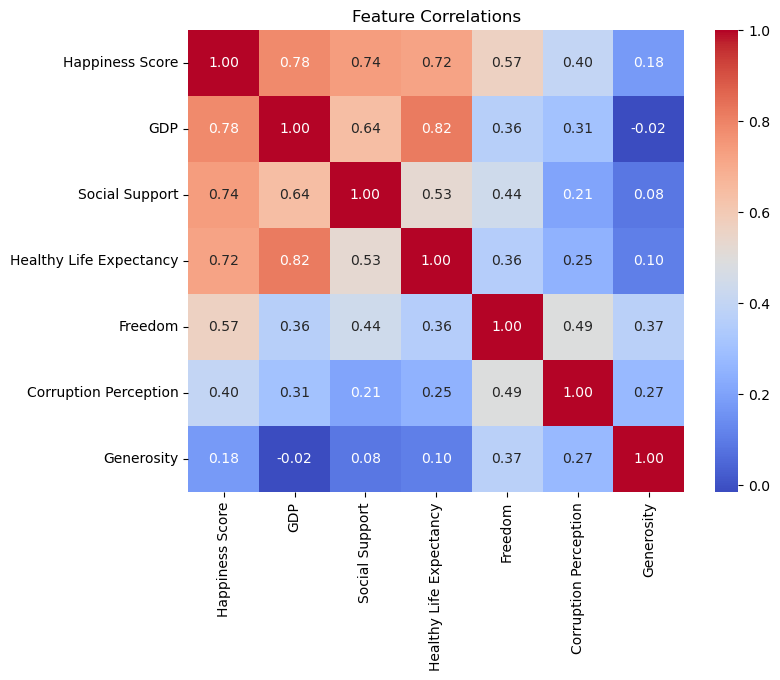

In [374]:
plt.figure(figsize=(8,6))
sns.heatmap(Feature_Correlation, annot= True, cmap = "coolwarm" , fmt = '.2f')
plt.title('Feature Correlations')
plt.show()

### Making Predictions with the highly correlated features selected

In [380]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = happiness_df[['GDP', 'Social Support', 'Healthy Life Expectancy']]
y = happiness_df[['Happiness Score']]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size= 0.2, random_state= 42)

# Linear Regression
LR = LinearRegression()
LR.fit(X_train, y_train)

# Predictions
lr_predictions = LR.predict(X_test)

from sklearn.neighbors import KNeighborsRegressor

# KNN - Ensure data is scaled if using KNN
knn_model = KNeighborsRegressor(n_neighbors=12)
knn_model.fit(X_train, y_train)

knn_predictions = knn_model.predict(X_test)

### Predict the happiness score of these countries that reported the following results for their numerical measures:
**Country 1**

- GDP: 0.9
- Social Support: 0.4
- Healthy Life Expectancy: 0.8
- Freedom: 0.4
- Corruption Perception: 0.2
- Generosity: 0.09
- Region Encoded: 0


In [382]:
#Linear Regression
Country1 = pd.DataFrame([[0.9,0.4,0.8]], columns = ['GDP', 'Social Support', 'Healthy Life Expectancy'])
prediction = LR.predict(Country1)
print("Linear Regression:",prediction)

#KNN
Country1 = pd.DataFrame([[0.9,0.4,0.8]], columns = ['GDP', 'Social Support', 'Healthy Life Expectancy'])
prediction2 = knn_model.predict(Country1)
print("KNN:",prediction2)

Linear Regression: [[4.64939187]]
KNN: [[4.78133333]]


**Country 2**

- GDP: 0.9
- Social Support: 0.4
- Healthy Life Expectancy: 0.8
- Freedom: 0.4
- Corruption Perception: 0.2
- Generosity: 0.09
- Region Encoded: 9

In [387]:
#Linear Regression
Country2 = pd.DataFrame([[0.9,0.4,0.8]], columns = ['GDP', 'Social Support', 'Healthy Life Expectancy'])
prediction = LR.predict(Country2)
print("Linear Regression:",prediction)

#KNN
Country2 = pd.DataFrame([[0.9,0.4,0.8]], columns = ['GDP', 'Social Support', 'Healthy Life Expectancy'])
prediction2 = knn_model.predict(Country2)
print("KNN:",prediction2)


Linear Regression: [[4.64939187]]
KNN: [[4.78133333]]


**Country 3**

- GDP: 1.1
- Social Support: 0.9
- Healthy Life Expectancy: 1.01
- Freedom: 0.9
- Corruption Perception: 0.1
- Generosity: 0.9
- Region Encoded: 4

In [399]:
Country3 = pd.DataFrame([[1.1,0.9,1.01]], columns = ['GDP', 'Social Support', 'Healthy Life Expectancy'])
prediction = LR.predict(Country3)
print("Linear Regression:",prediction)

#KNN
Country3 = pd.DataFrame([[1.1,0.9,1.01]], columns = ['GDP', 'Social Support', 'Healthy Life Expectancy'])
prediction2 = knn_model.predict(Country3)
print("KNN:",prediction2)

Linear Regression: [[5.90855543]]
KNN: [[5.46283333]]


### Questions and Answers to reflect:
_**NB: Several models have been trained to accomplish this task.**_

- **Were there any hyperparameters you need to tune and, if so, what were the best values you found?**
_The KNN hyperparameter was adjusted from 5 to 12 in the second part (compared to just 5 in the first part) because fewer features were used. Increasing the KNN value was necessary to fit the model more efficiently with the reduced feature set._
- **Did selecting a smaller number of features improve or decrease the performance of your model?**
_Selecting fewer features reduced the model's performance because all features, even those not highly correlated (like Corruption Perception and Freedom), are important for predicting the Happiness Score. Therefore, including more relevant features improves the predictions._
- **What three (3) variables seem to play the largest role in determining Happiness Score based on your work in this part?**
_The three (3) features are: GDP, Social Support, and Healthy Life Expectancy._